In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.utils import to_time_series_dataset
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
np.set_printoptions(suppress=True, precision=5)

In [3]:
KatalogPickli="Pickle"
outDir="../src/OutDir1024"

In [5]:
def standaryzacjaSzeregow(szeregi):
    for i in range(szeregi.shape[0]):
        szeregi[i,:]-=szeregi[i,:].mean()
        szeregi[i,:]/=szeregi[i,:].std()

In [6]:
with open(os.path.join(KatalogPickli, "Ecola-1024-ustandaryzowane-roznaDl.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)

In [5]:
with open(os.path.join(KatalogPickli, "Ecola-1024-triplet.pickle"), "rb") as plik:
    _,_,szeregiDl=pickle.load(plik)

# Softdtw

### Wykres silhouette

In [9]:
reExpr=re.compile(r".*([1-9])\.0\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [10]:
listaPasujacych={}
listaOdl={}
for plik in os.listdir(outDir):
    dopasowanie=reExpr.match(plik)
    if dopasowanie is not None:
        if reExprOdl.match(plik) is None:
            gamma=dopasowanie.groups()[0]
            gamma=int(gamma)
            if gamma not in listaPasujacych:
                listaPasujacych[gamma]=[]
            listaPasujacych[gamma].append(plik)
        else:
            gamma=dopasowanie.groups()[0]
            gamma=int(gamma)
            listaOdl[gamma]=plik

In [25]:
listaPasujacych[7]

['1630310474.9820805-n_cluster-4-gamma-7.0.pickle',
 '1630332807.6099448-n_cluster-5-gamma-7.0.pickle',
 '1630317263.4406128-n_cluster-2-gamma-7.0.pickle',
 '1630341429.7052262-n_cluster-7-gamma-7.0.pickle',
 '1630324489.028807-n_cluster-3-gamma-7.0.pickle',
 '1630327989.2733529-n_cluster-6-gamma-7.0.pickle']

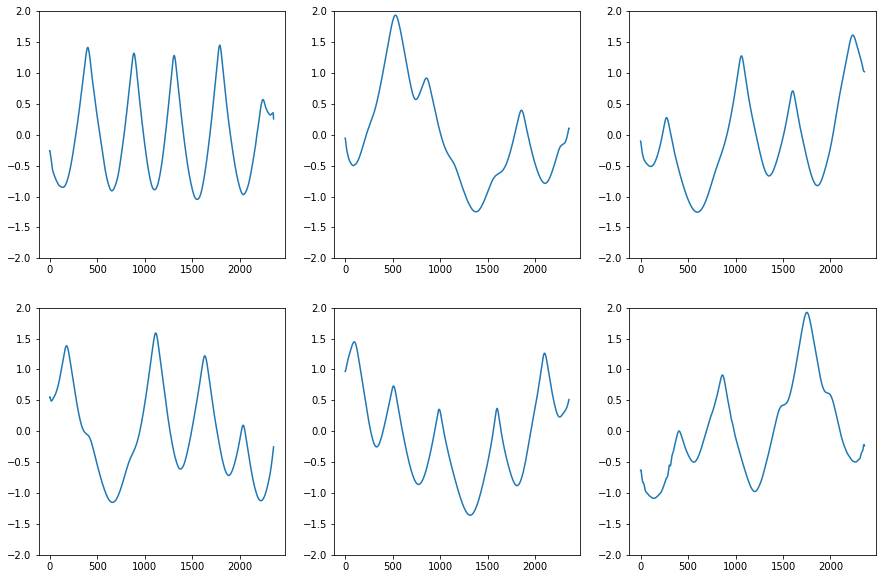

In [26]:
with open(os.path.join("../src/OutDir1024/",'1630327989.2733529-n_cluster-6-gamma-7.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.ylim(-2, 2)
    plt.plot(model.cluster_centers_[i].ravel())

In [17]:
listaSilhouetteScore={}
for gamma in range(1,10):
    listaSilhouetteScore[gamma]=[None for i in range(6)]
    with open(os.path.join(outDir, listaOdl[gamma]), "rb") as plik:
        odl=pickle.load(plik)
    for plik in listaPasujacych[gamma]:
        with open(os.path.join(outDir,plik), "rb") as file:
            model=pickle.load(file)
        etykiety=model.predict(szeregi)
        ocena=silhouette_score(odl, etykiety, metric="precomputed")
        listaSilhouetteScore[gamma][model.n_clusters-2]=ocena

In [18]:
listaSilhouetteScore

{1: [0.12109375856208864,
  0.08221952317807871,
  0.0390361978301938,
  0.040160827980333144,
  0.021034318534198793,
  0.012716267689636981],
 2: [0.09264727641509464,
  0.07760765761342238,
  0.055626784156464715,
  0.036304040417837,
  0.011555574302751535,
  0.006224417569936676],
 3: [0.0843067894902416,
  0.0807421070953033,
  0.05348747321989836,
  0.037536864890188905,
  0.016314460308828393,
  0.005925724661880806],
 4: [0.088479105754922,
  0.07565055714431389,
  0.04811046122524145,
  0.02953040773971804,
  -0.011584476586908239,
  -0.0022851419685770754],
 5: [0.1194011727333438,
  0.06520219612923418,
  0.03995371718625347,
  0.02530379979242953,
  -0.001260621016793311,
  0.0072106858032647035],
 6: [0.09949663341092119,
  0.05045127570995799,
  0.03009540360024434,
  0.021804979871649848,
  -0.0019624822528206895,
  -0.007637381214818219],
 7: [0.11991815638665433,
  0.05373354405216706,
  0.025842663983948216,
  0.0008881510660042419,
  -0.006188832511746701,
  -0.0082

In [6]:
listaSilhouetteScore={2: [0.25824816262703193,
  0.23402697054027666,
  0.2042691550081344,
  0.19134659387213207,
  0.1888711591973867,
  0.17971228246435925],
 3: [0.19829302881690478,
  0.22650796222537503,
  0.2095548003947836,
  0.2062708842595507,
  0.1825104461850626,
  0.19362760878520055],
 4: [0.21119283788653076,
  0.2259469232284517,
  0.2179103894986978,
  0.19659803983100677,
  0.19912249065447393,
  0.19028546868987503],
 5: [0.25754072679396206,
  0.23934445349956773,
  0.21414788967710624,
  0.2086089975813493,
  0.19674202486352763,
  0.19582057778373074],
 6: [0.22954690595907679,
  0.2433084702769951,
  0.21284437629431222,
  0.21560277616382326,
  0.1943400515351611,
  0.20364733007085392],
 7: [0.23489448545180694,
  0.24326287835774044,
  0.22548802101522625,
  0.2144593296146226,
  0.21193953364452248,
  0.20374681907596223],
 8: [0.2464231020438352,
  0.24664766400619204,
  0.22962691159529222,
  0.21606829694136176,
  0.2058595878626948,
  0.19811005133120313]}

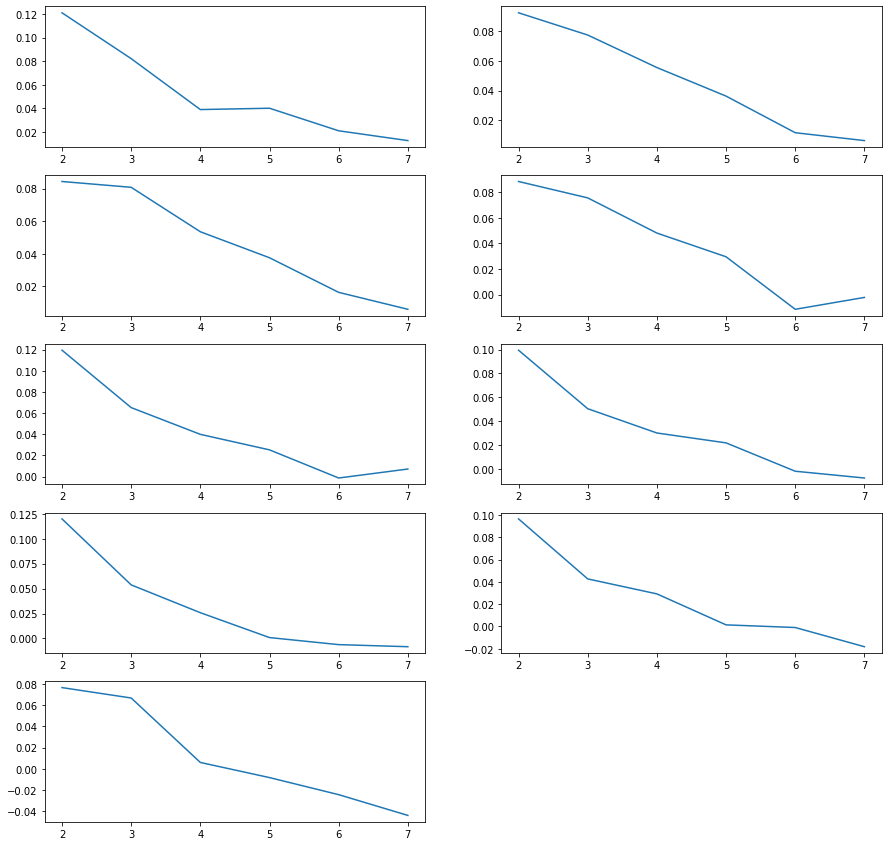

In [20]:
plt.gcf().set_size_inches(15,15)
for gamma in range(1,10):
    plt.subplot(5,2,gamma)
    plt.plot(range(2,8), listaSilhouetteScore[gamma])

In [23]:
listaSilhouetteScoreKmeans={}
for gamma in range(1,10):
    listaSilhouetteScoreKmeans[gamma]=[None for i in range(6)]
    with open(os.path.join(outDir, listaOdl[gamma]), "rb") as plik:
        odl=pickle.load(plik)
    for k in range(2,8):
        model=KMeans(k)
        etykiety=model.fit_predict(szeregi.reshape(szeregi.shape[:2]))
        ocena=silhouette_score(odl, etykiety, metric="precomputed")
        listaSilhouetteScoreKmeans[gamma][model.n_clusters-2]=ocena

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

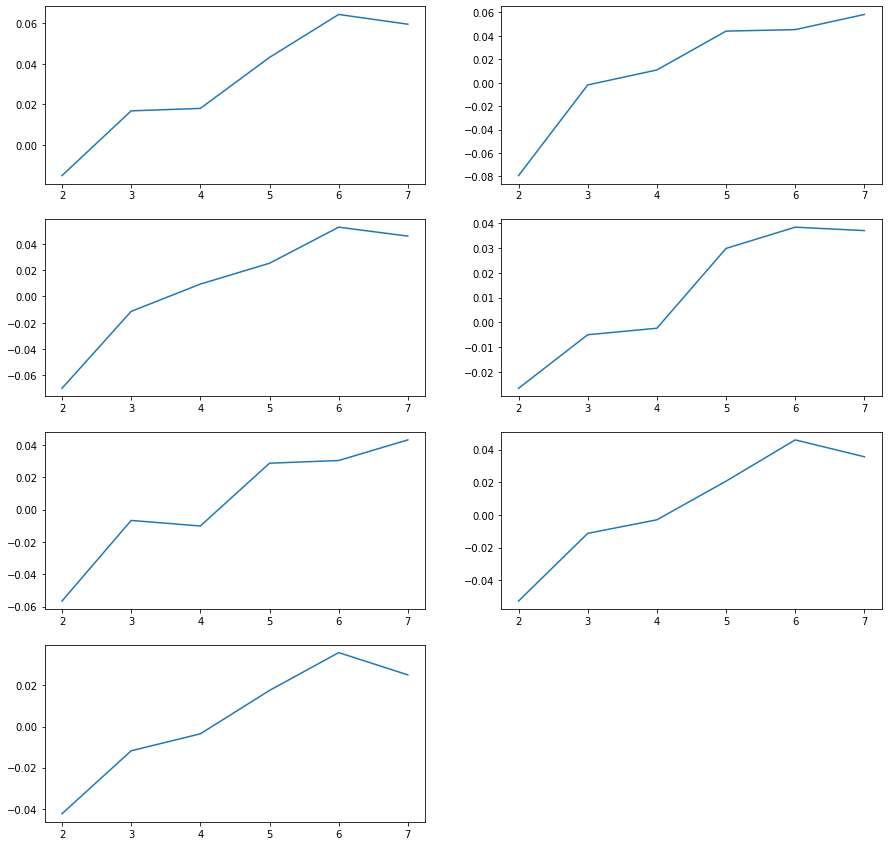

In [11]:
plt.gcf().set_size_inches(15,15)
for gamma in range(2,9):
    plt.subplot(4,2,gamma-1)
    plt.plot(range(2,8), np.array(listaSilhouetteScore[gamma])-np.array(listaSilhouetteScoreKmeans[gamma]))

In [13]:
roznice=[]
for gamma in range(2,9):
    roznice.append(listaSilhouetteScore[gamma][-2]-listaSilhouetteScoreKmeans[gamma][-2])

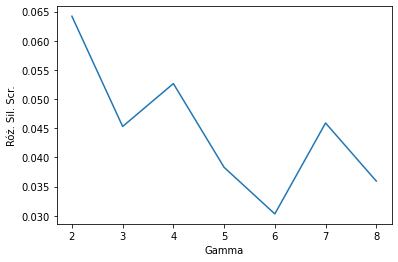

In [18]:
plt.plot(range(2,9), roznice)
plt.xlabel("Gamma")
plt.ylabel("Róż. Sil. Scr.")
plt.show()